In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('hotel_reviews.xlsx')

In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a clean text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [5]:
df['cleaned_text']=df['Review'].apply(clean_text)

In [6]:
df

,Review,Rating,cleaned_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm star ca...
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,ok looks nice modern outside desk staff nt par...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...


In [7]:
data1=df.copy()

In [8]:
# !pip install afinn

In [9]:
from afinn import Afinn

In [10]:
def sentiment_scores(sentence):

    # instantiate afinn
    sid_obj = Afinn()

    # polarity_scores method of afinn
    sentiment_dict = sid_obj.score(sentence)

    # decide sentiment as positive, negative and neutral
    if sentiment_dict >= 0 :
        return "Positive review",sentiment_dict
    else :
        return "Negative review",sentiment_dict

In [11]:
dad1=pd.DataFrame()
dad1=pd.DataFrame(list(data1['cleaned_text'].apply(sentiment_scores)),columns=['Sentiment_Affin', 'Score'])
data1=pd.concat([data1,dad1],axis=1)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample reviews
reviews = data1["Review"].values

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True,stop_words='english',max_features=500)

# Fit and transform the reviews into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

# tfidf_matrix contains the TF-IDF vectors of the reviews
vocabulary = tfidf_vectorizer.get_feature_names_out()

In [13]:
tfidf_array = tfidf_matrix.toarray()
tfidf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08292695, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02726652, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33639685,
        0.        ]])

In [14]:
tfidf_list=[]
for i in tfidf_array:
    tfidf_list.append(i)

In [15]:
tfidf_df=pd.DataFrame({'tfidf':tfidf_list})
tfidf_df

,tfidf
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.08292695300203265, 0.0, 0.0, 0.0,..."
2,"[0.0, 0.0, 0.0, 0.09038349174562196, 0.0, 0.0,..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
20486,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
20487,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
20488,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
20489,"[0.0, 0.027266515058223226, 0.0, 0.0, 0.0, 0.0..."


In [16]:
data1=pd.concat([data1,tfidf_df],axis=1)

In [17]:
tfidf_df.tfidf.loc[0].shape

(500,)

In [18]:
for i in tfidf_vectorizer.transform(["i am good boy"]).toarray():
    print(np.sum(i))

1.0


In [19]:
data1['Sentiment']=data1['Sentiment_Affin'].replace({"Positive review":1,"Negative review":0})
data1

,Review,Rating,cleaned_text,Sentiment_Affin,Score,tfidf,Sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,Positive review,26.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,Positive review,40.0,"[0.0, 0.0, 0.08292695300203265, 0.0, 0.0, 0.0,...",1
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms experience hotel monaco seattle goo...,Positive review,20.0,"[0.0, 0.0, 0.0, 0.09038349174562196, 0.0, 0.0,...",1
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Positive review,39.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,Positive review,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm star ca...,Positive review,27.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,Positive review,19.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
20488,"ok just looks nice modern outside, desk staff ...",2,ok looks nice modern outside desk staff nt par...,Positive review,7.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,Negative review,-5.0,"[0.0, 0.027266515058223226, 0.0, 0.0, 0.0, 0.0...",0


In [20]:
x=np.stack(data1['tfidf'])
y=data1['Sentiment']

In [21]:
from imblearn.over_sampling import SMOTE
import numpy as np
# Initialize the SMOTE algorithm
smote = SMOTE(random_state=42)  # You can adjust the hyperparameters as needed
print(x)
# Apply SMOTE to balance the dataset
x, y = smote.fit_resample(x, y)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.08292695 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02726652 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.33639685 0.        ]]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state =61)

In [23]:
#X_train = np.stack(X_train)
#X_test  = np.stack(X_test)

In [24]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00276499, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    cm_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=0)[:, np.newaxis] * 100
    sns.heatmap(cf_matrix, annot=True,cmap = 'Blues',fmt = '.1f',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [26]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
from sklearn.metrics import roc_curve, auc
roc_curves={}
class_names=["Negative","Positive"]
def plot_model(model):
    # Set the target labels for the current binary classification task
    #model.fit(X_train, y_train)
    try:
        y_pred_a = model.predict_proba(X_test)
        fpr, tpr, _ =roc_curve(y_test, y_pred_a[:,1])
    except AttributeError as e:
        y_pred_a = model.decision_function(X_test)
        fpr, tpr, _ =roc_curve(y_test, y_pred_a)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.show()

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      3853
           1       0.76      0.87      0.81      3820

    accuracy                           0.80      7673
   macro avg       0.80      0.80      0.79      7673
weighted avg       0.80      0.80      0.79      7673



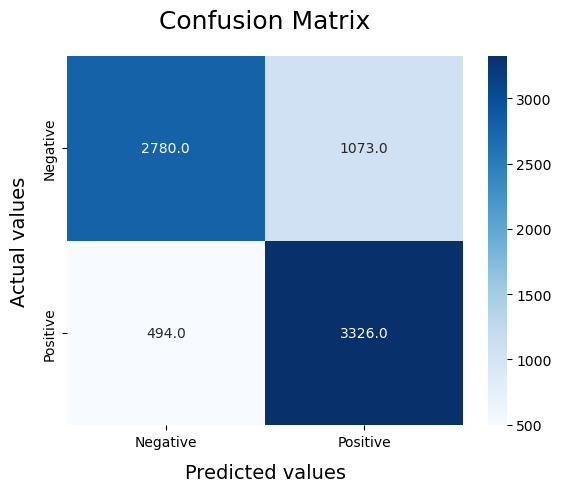

In [29]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

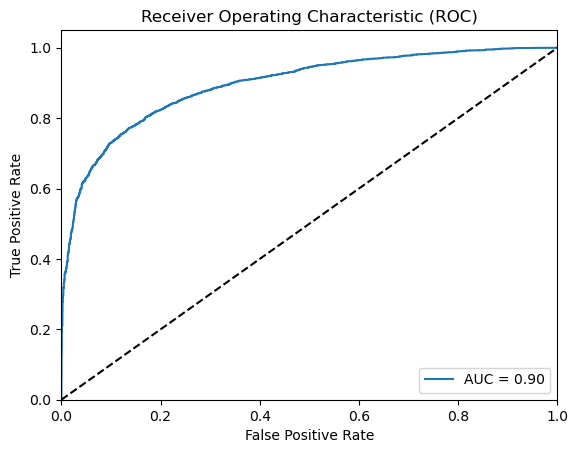

In [30]:
plot_model(BNBmodel)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3853
           1       1.00      0.99      0.99      3820

    accuracy                           0.99      7673
   macro avg       0.99      0.99      0.99      7673
weighted avg       0.99      0.99      0.99      7673



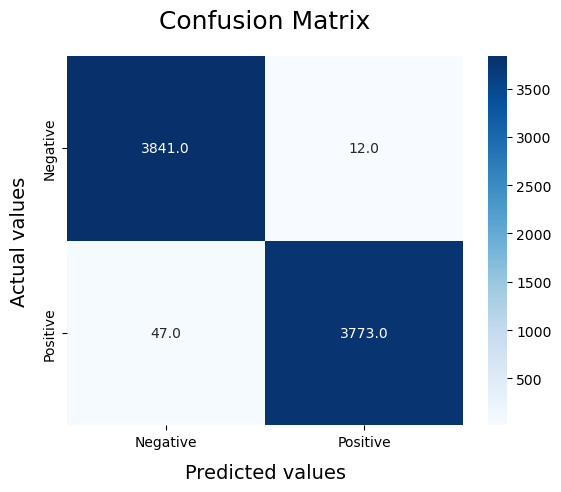

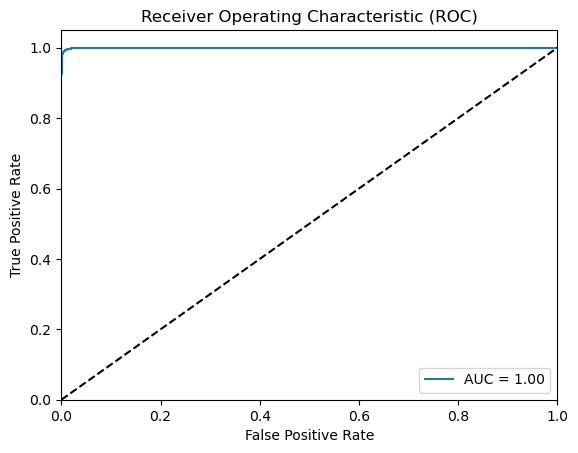

In [31]:
from sklearn.svm import SVC
SVCmodel = SVC(probability=True)
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
plot_model(SVCmodel)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3853
           1       0.98      0.93      0.95      3820

    accuracy                           0.95      7673
   macro avg       0.96      0.95      0.95      7673
weighted avg       0.96      0.95      0.95      7673



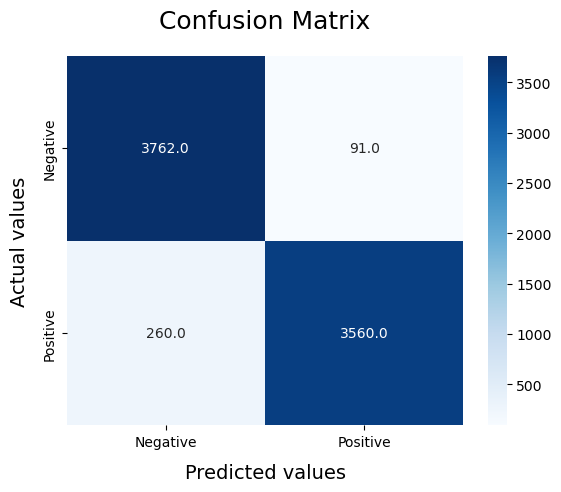

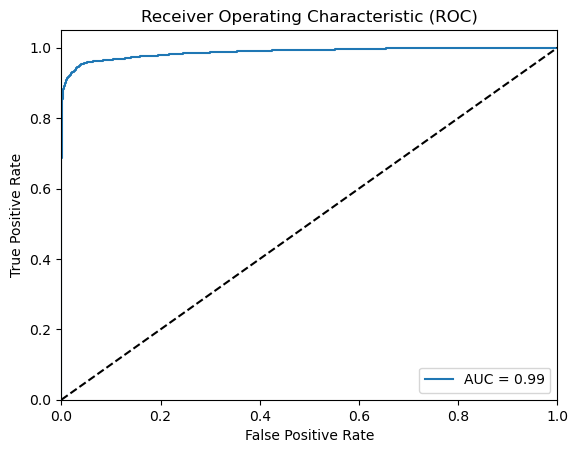

In [32]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
plot_model(LRmodel)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3853
           1       0.99      0.97      0.98      3820

    accuracy                           0.98      7673
   macro avg       0.98      0.98      0.98      7673
weighted avg       0.98      0.98      0.98      7673



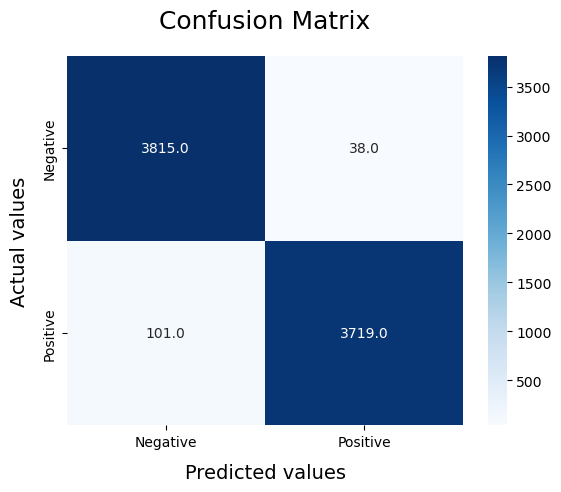

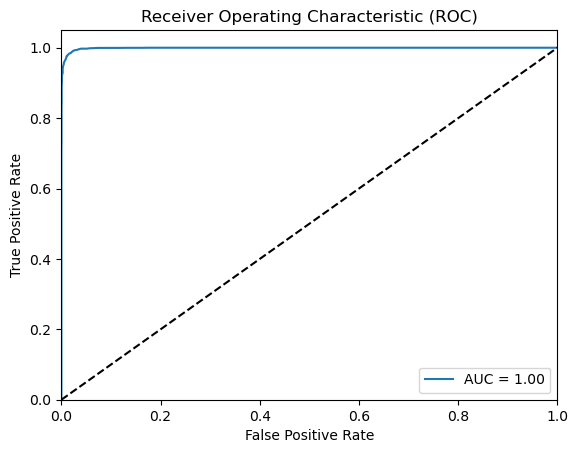

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model_Evaluate(model)
y_pred4 = model.predict(X_test)
plot_model(model)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3853
           1       0.97      0.92      0.95      3820

    accuracy                           0.95      7673
   macro avg       0.95      0.95      0.95      7673
weighted avg       0.95      0.95      0.95      7673



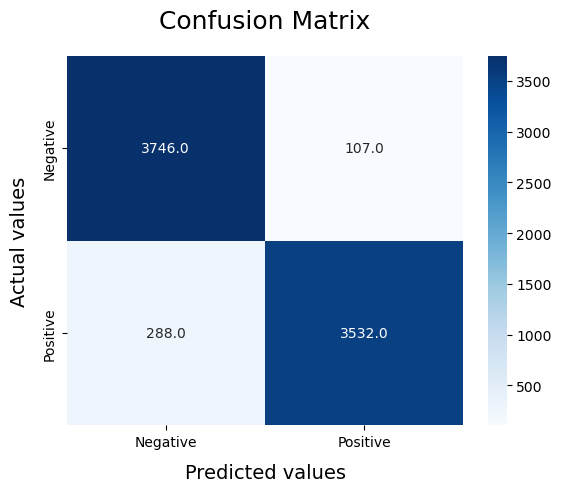

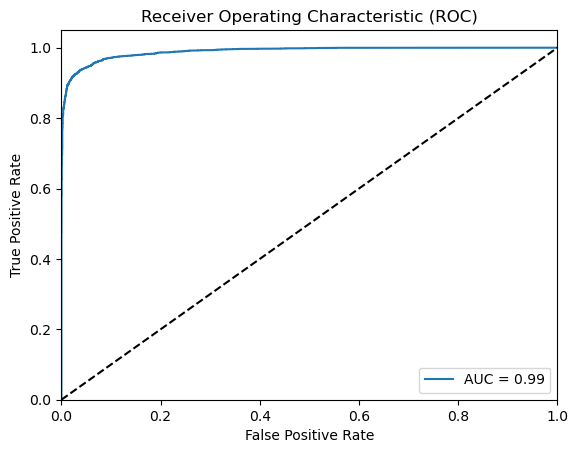

In [34]:
import xgboost as xgb
model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=2,  # Replace with the actual number of classes
    nthread=4,
    seed=27
)
model.fit(X_train, y_train)
model_Evaluate(model)
y_pred5 = model.predict(X_test)
plot_model(model)

In [35]:
print(np.round(np.mean(y_pred1==y_test)*100,2) , "Bernoulli Naive Bayes Model")
print(np.round(np.mean(y_pred2==y_test)*100,2) , "SVC model")
print(np.round(np.mean(y_pred3==y_test)*100,2) , "Linear Regression Model")
print(np.round(np.mean(y_pred4==y_test)*100,2) , "Random Forest Classifier Model")
print(np.round(np.mean(y_pred5==y_test)*100,2) , "XGBoost Classifier Model")

79.58 Bernoulli Naive Bayes Model
99.23 SVC model
95.43 Linear Regression Model
98.19 Random Forest Classifier Model
94.85 XGBoost Classifier Model


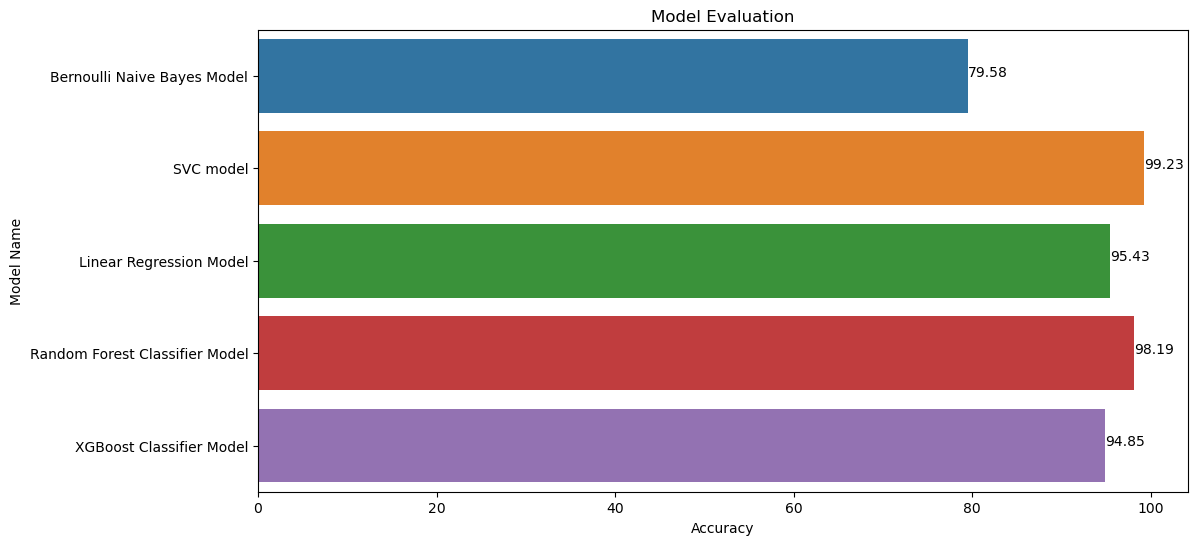

In [36]:
list_model=[np.round(np.mean(y_pred1==y_test)*100,2),np.round(np.mean(y_pred2==y_test)*100,2),
            np.round(np.mean(y_pred3==y_test)*100,2),np.round(np.mean(y_pred4==y_test)*100,2),
            np.round(np.mean(y_pred5==y_test)*100,2)]

model_names=["Bernoulli Naive Bayes Model","SVC model","Linear Regression Model","Random Forest Classifier Model","XGBoost Classifier Model"]

plt.figure(figsize=(12,6))
x=model_names
y=list_model
ax=sns.barplot(y=x,x=y)
for j,v in enumerate(list_model):
    ax.text(v,j,str(v))
ax.set_xlabel("Accuracy")
ax.set_ylabel("Model Name")
plt.title("Model Evaluation")
plt.show()

In [37]:
model.predict(np.stack(tfidf_vectorizer.transform(["i am bad boy"]).toarray()))

array([0])

In [38]:
import pickle


In [39]:
# Specify the filename where you want to save the model
model_filename = 'trained_model.pkl'

# Dump the model to the file
with open(model_filename, 'wb') as file:
    pickle.dump(SVCmodel, file)


In [40]:
# Specify the filename where you want to save the model
model_filename = 'vectorizer_model.pkl'

# Dump the model to the file
with open(model_filename, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [41]:
SVCmodel.predict(np.stack(tfidf_vectorizer.transform(["i am bad boy"]).toarray()))

array([0], dtype=int64)

In [42]:
models=[BernoulliNB(),SVC(),LogisticRegression(),RandomForestClassifier(),xgb.XGBClassifier()]

In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

X=data1['tfidf']
y=data1['Sentiment']

# Define the number of splits (K)
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # You can adjust the shuffle and random_state as needed

# Initialize a list to store evaluation scores

score_dict={}
for model in models:
# Iterate through the folds
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train = np.stack(X_train)
        X_test = np.stack(X_test)
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy for this fold
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)

    # Calculate the average accuracy across all folds
    average_accuracy = sum(scores) / k
    score_dict["scores"+str(model)]=scores

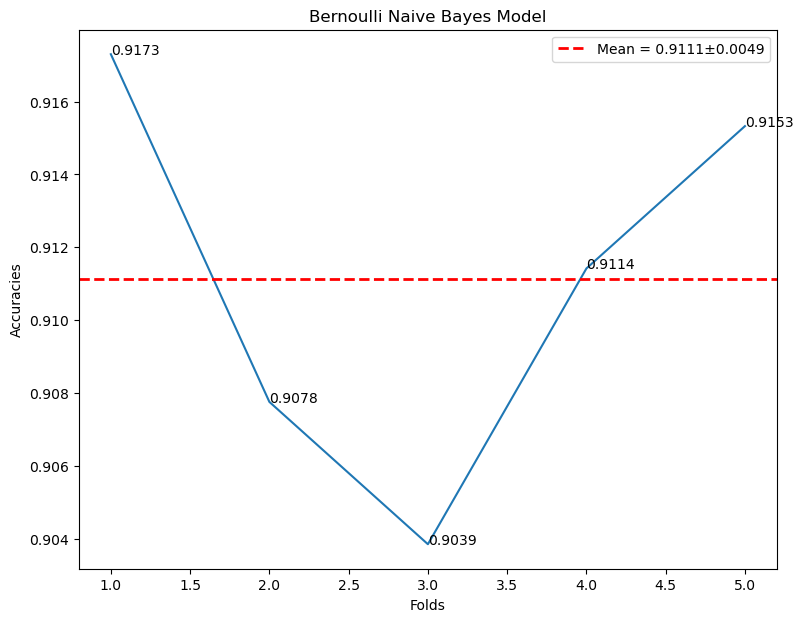

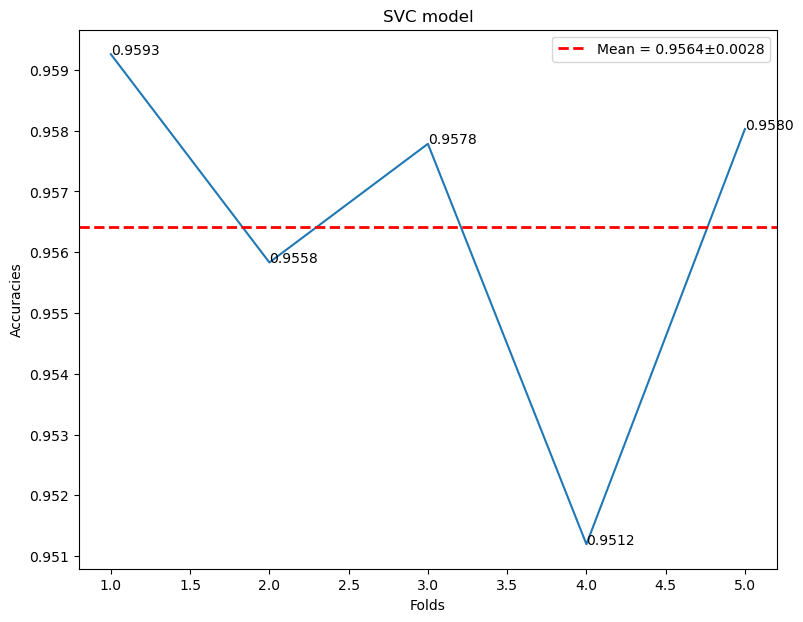

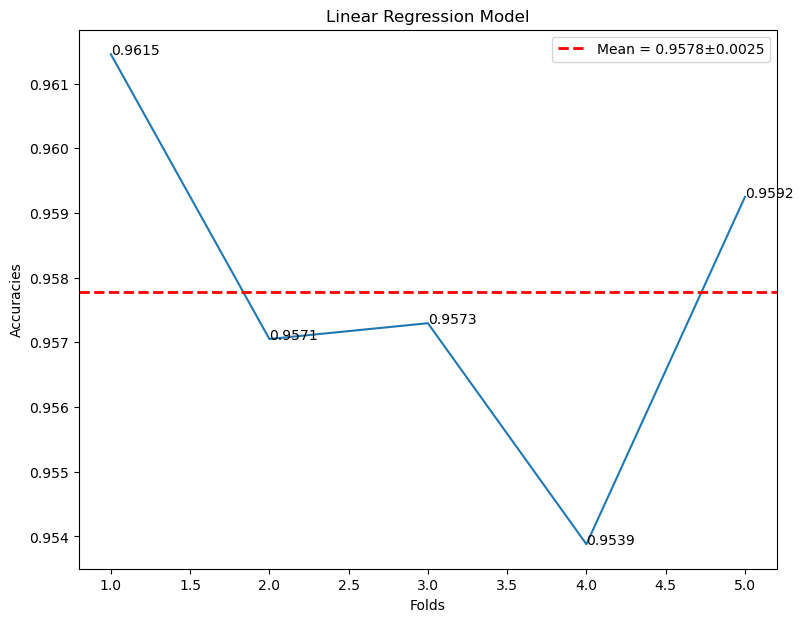

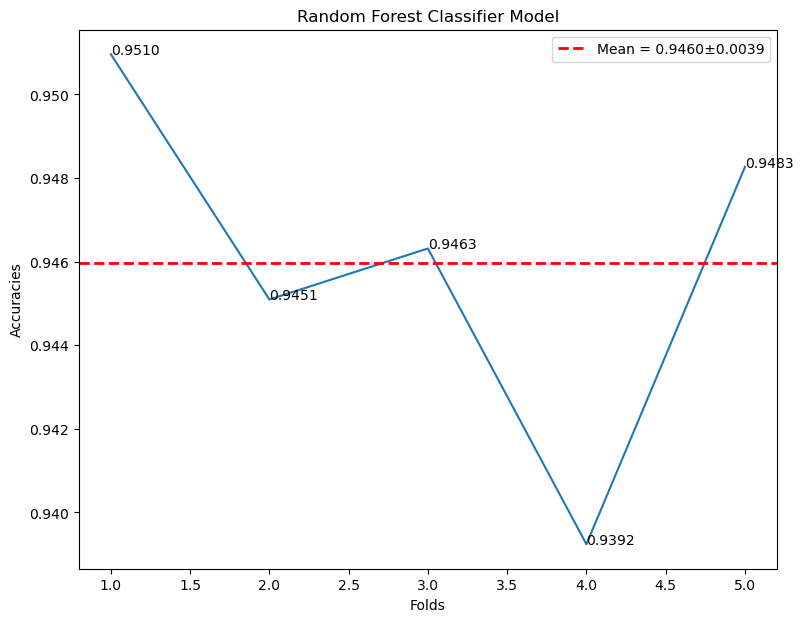

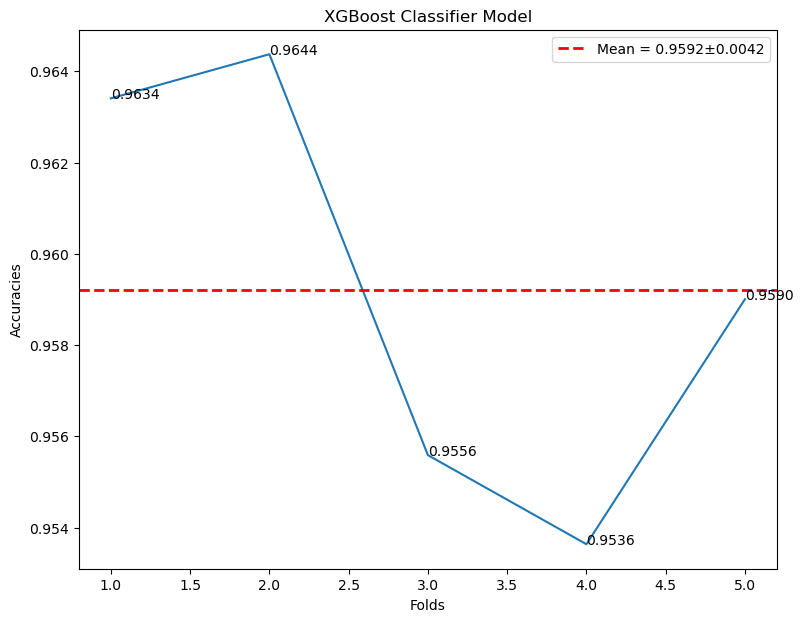

In [44]:
k=0
for i in score_dict.values():
    y=i
    x=range(1,6)
    plt.figure(figsize=(9,7))
    ax=sns.lineplot(x=x,y=y)
    for j,v in enumerate(y):
        ax.text(j+1,v,f'{v:.4f}')
    plt.axhline(y=np.mean(y), color='red', linestyle='dashed', linewidth=2, label=f'Mean = {np.mean(y):.4f}'+"±"+f'{np.std(y):.4f}')
    ax.set_xlabel("Folds")
    ax.set_ylabel("Accuracies")
    plt.title(model_names[k])
    k=k+1
    plt.legend()
    plt.show()